# Italy Solar Generation Descriptive Analysis - Ganesh Ram Gururajan

In [1]:
import pandas as pd
import seaborn as sns

In [40]:
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/ganes/Data Science/Datasets/italy_solar.csv')

In [3]:
data.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


In [4]:
data.shape

(8784, 3)

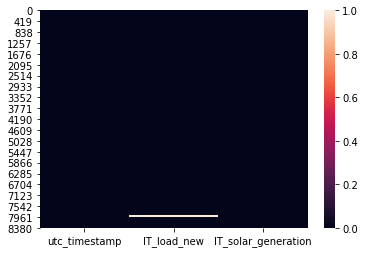

In [5]:
sns.heatmap(data.isnull())

In [6]:
def impute(col):
    if pd.isnull(col):
        return data['IT_load_new'].mean()
    else:
        return col

In [7]:
data['IT_load_new'] = data['IT_load_new'].apply(impute)

In [8]:
data.shape

(8784, 3)

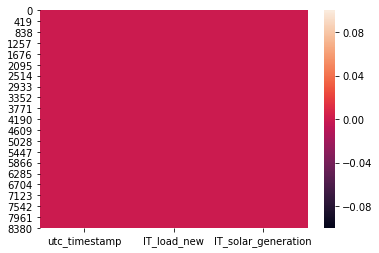

In [9]:
sns.heatmap(data.isnull())

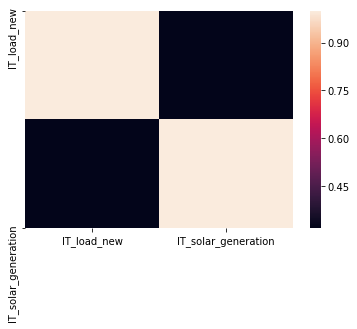

In [10]:
sns.heatmap(data.corr())

In [11]:
data.head()

,utc_timestamp,IT_load_new,IT_solar_generation
0,2016-01-01T00:00:00Z,21665.0,1
1,2016-01-01T01:00:00Z,20260.0,0
2,2016-01-01T02:00:00Z,19056.0,0
3,2016-01-01T03:00:00Z,18407.0,0
4,2016-01-01T04:00:00Z,18425.0,0


In [12]:
def get_month(col):
    return col.split('-')[1]

def get_day(col):
    return col.split('-')[2]

In [13]:
data['month'] = data['utc_timestamp'].apply(get_month)
data['day'] = data['utc_timestamp'].apply(get_day)

In [14]:
data.head()

,utc_timestamp,IT_load_new,IT_solar_generation,month,day
0,2016-01-01T00:00:00Z,21665.0,1,01,01T00:00:00Z
1,2016-01-01T01:00:00Z,20260.0,0,01,01T01:00:00Z
2,2016-01-01T02:00:00Z,19056.0,0,01,01T02:00:00Z
3,2016-01-01T03:00:00Z,18407.0,0,01,01T03:00:00Z
4,2016-01-01T04:00:00Z,18425.0,0,01,01T04:00:00Z


In [15]:
def split_day(col):
    return col.split('T')[0]

In [16]:
data['day'] = data['day'].apply(split_day)

In [17]:
data.head()

,utc_timestamp,IT_load_new,IT_solar_generation,month,day
0,2016-01-01T00:00:00Z,21665.0,1,01,01
1,2016-01-01T01:00:00Z,20260.0,0,01,01
2,2016-01-01T02:00:00Z,19056.0,0,01,01
3,2016-01-01T03:00:00Z,18407.0,0,01,01
4,2016-01-01T04:00:00Z,18425.0,0,01,01


In [18]:
def get_hour(col):
    left_half = col.split(':')[0]
    return left_half.split('T')[1]

In [19]:
data['hour'] = data['utc_timestamp'].apply(get_hour)

In [20]:
data.head()

,utc_timestamp,IT_load_new,IT_solar_generation,month,day,hour
0,2016-01-01T00:00:00Z,21665.0,1,01,01,00
1,2016-01-01T01:00:00Z,20260.0,0,01,01,01
2,2016-01-01T02:00:00Z,19056.0,0,01,01,02
3,2016-01-01T03:00:00Z,18407.0,0,01,01,03
4,2016-01-01T04:00:00Z,18425.0,0,01,01,04


In [21]:
data.drop(['utc_timestamp'],axis=1,inplace=True)

In [22]:
data.head()

,IT_load_new,IT_solar_generation,month,day,hour
0,21665.0,1,01,01,00
1,20260.0,0,01,01,01
2,19056.0,0,01,01,02
3,18407.0,0,01,01,03
4,18425.0,0,01,01,04


Text(0, 0.5, 'Generation')

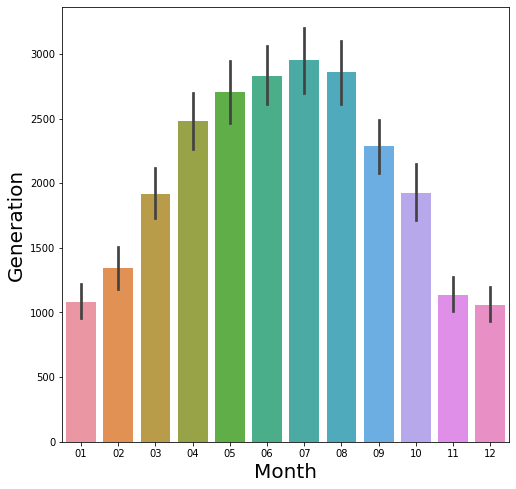

In [50]:
plt.figure(figsize=(8,8))
sns.barplot(x='month',y='IT_solar_generation',data=data)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Generation',fontsize=20)

Text(0, 0.5, 'Generation')

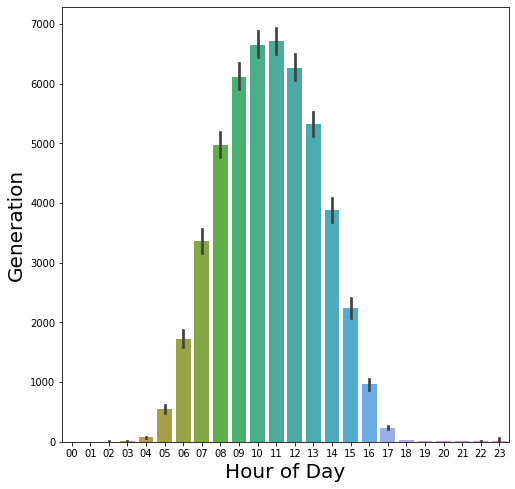

In [49]:
plt.figure(figsize=(8,8))
sns.barplot(x='hour',y='IT_solar_generation',data=data)
plt.xlabel('Hour of Day',fontsize=20)
plt.ylabel('Generation',fontsize=20)

Text(0, 0.5, 'Generation')

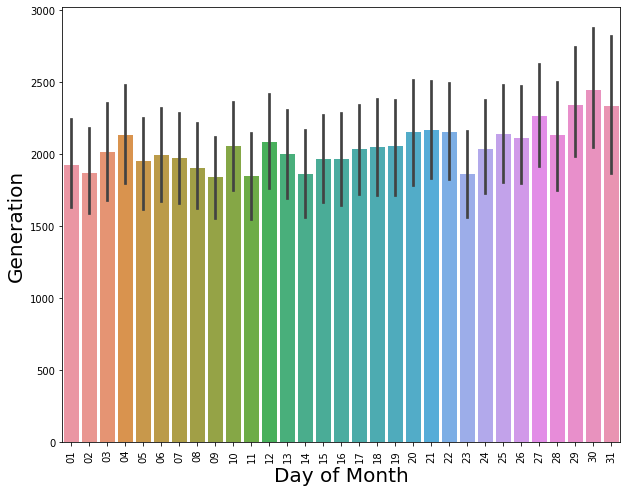

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(x='day',y='IT_solar_generation',data=data)
plt.xticks(rotation = 90)
plt.xlabel('Day of Month',fontsize=20)
plt.ylabel('Generation',fontsize=20)

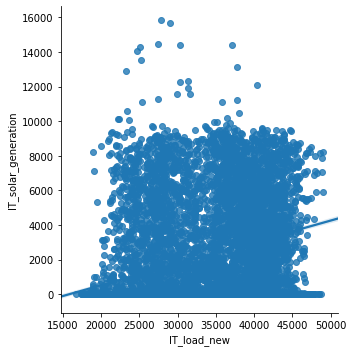

In [25]:
sns.lmplot(x='IT_load_new',y='IT_solar_generation',data=data)

In [26]:
X = data.drop(['IT_solar_generation'],axis=1)
y = data['IT_solar_generation']

In [27]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=100)

In [52]:
X_train.shape,y_train.shape

((7027, 4), (7027,))

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rf = RandomForestRegressor()

In [55]:
rf.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
pred1 = rf.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

# Result : Prediction with minimum 270 units of error

In [58]:
print(mae(y_test,pred1))

269.1032441661924
